In [1]:
from metrics.evaluation import cross_validate_stratify, present_metrics, get_metrics
from visualizer.barchart import plot_bar_chart_comparison
from sklearn import preprocessing
from sklearn.cross_validation import StratifiedShuffleSplit, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import SVC

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

using it all together

In [2]:
label = pd.read_csv("data/dataset.csv")
labely = label.iloc[:, 13].values
sss = StratifiedShuffleSplit(labely, n_iter=1, test_size=0.4, random_state=0)

for train_index, test_index in sss:
    train_indices= train_index
    test_indices = test_index
skf = StratifiedKFold(labely[train_indices], n_folds=3)

# DATA SET INDIVIDUAL

In [3]:
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 45)].values)
y = df.iloc[:, 45].values

svm = SVC(class_weight='balanced', kernel="linear")

resulti_all_lin = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_all_lin = resulti_all_lin["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_all_lin["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_all_lin["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_all_lin["matt_cross_val"])
print "GMEAN: " + str(resulti_all_lin["gmean_cross_val"])
print ""
present_metrics(gmeani_all_lin, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.851851851852
SPECIFICITY: 0.945736434109
MATTHEWS CORR COEF: 0.784223054238
GMEAN: 0.893998113157

####### TEST GMEAN #######
SENSITIVITY: 0.526315789474
SPECIFICITY: 0.886363636364
MATTHEWS CORR COEF: 0.404535212104
GMEAN: 0.68301330663


CONFUSION MATRIX
10	9
10	78


In [4]:
# USING RBF KERNEL
svm = SVC(class_weight='balanced')

resulti_all_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_all_rbf = resulti_all_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_all_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_all_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_all_rbf["matt_cross_val"])
print "GMEAN: " + str(resulti_all_rbf["gmean_cross_val"])
print ""
present_metrics(gmeani_all_rbf, "GMEAN")



CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.969168428471
MATTHEWS CORR COEF: 0.785953677618
GMEAN: 0.877187160928

####### TEST GMEAN #######
SENSITIVITY: 0.736842105263
SPECIFICITY: 0.931818181818
MATTHEWS CORR COEF: 0.655464300192
GMEAN: 0.828615031733


CONFUSION MATRIX
14	5
6	82


# DATA SET INDIVIDUAL NO VORONOI TESSELLATION

In [5]:
df = pd.read_csv("data/datasetindividual.csv")

X = np.matrix(df.iloc[:, range(0, 40)].values)
y = df.iloc[:, 45].values

svm = SVC(class_weight='balanced', kernel="linear")

resulti_novoronoi_lin = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_novoronoi_lin = resulti_novoronoi_lin["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_novoronoi_lin["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_novoronoi_lin["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_novoronoi_lin["matt_cross_val"])
print "GMEAN: " + str(resulti_novoronoi_lin["gmean_cross_val"])
print ""
present_metrics(gmeani_novoronoi_lin, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.740740740741
SPECIFICITY: 0.937984496124
MATTHEWS CORR COEF: 0.678241817349
GMEAN: 0.808432731001

####### TEST GMEAN #######
SENSITIVITY: 0.526315789474
SPECIFICITY: 0.852272727273
MATTHEWS CORR COEF: 0.352194048172
GMEAN: 0.669749649721


CONFUSION MATRIX
10	9
13	75


In [6]:
# USING RBF KERNEL
svm = SVC(class_weight='balanced')

resulti_novoronoi_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeani_novoronoi_rbf = resulti_novoronoi_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resulti_novoronoi_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resulti_novoronoi_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resulti_novoronoi_rbf["matt_cross_val"])
print "GMEAN: " + str(resulti_novoronoi_rbf["gmean_cross_val"])
print ""
present_metrics(gmeani_novoronoi_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.953840732911
MATTHEWS CORR COEF: 0.753453678438
GMEAN: 0.870636866192

####### TEST GMEAN #######
SENSITIVITY: 0.789473684211
SPECIFICITY: 0.931818181818
MATTHEWS CORR COEF: 0.69401730299
GMEAN: 0.857698043028


CONFUSION MATRIX
15	4
6	82


# DATA SET ALL MEAN

In [7]:
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 13)].values)
y = df.iloc[:, 13].values

svm = SVC(class_weight='balanced', kernel="linear")

resultm_all_lin = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_all_lin = resultm_all_lin["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_all_lin["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_all_lin["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_all_lin["matt_cross_val"])
print "GMEAN: " + str(resultm_all_lin["gmean_cross_val"])
print ""
present_metrics(gmeanm_all_lin, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.814814814815
SPECIFICITY: 0.953664552502
MATTHEWS CORR COEF: 0.751118187578
GMEAN: 0.870592307362

####### TEST GMEAN #######
SENSITIVITY: 0.684210526316
SPECIFICITY: 0.897727272727
MATTHEWS CORR COEF: 0.55026754721
GMEAN: 0.783731108073


CONFUSION MATRIX
13	6
9	79


In [8]:
# USING RBF KERNEL
svm = SVC(class_weight='balanced')

resultm_all_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_all_rbf = resultm_all_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_all_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_all_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_all_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_all_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_all_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.851851851852
SPECIFICITY: 0.922656800564
MATTHEWS CORR COEF: 0.724616376397
GMEAN: 0.881486099966

####### TEST GMEAN #######
SENSITIVITY: 0.842105263158
SPECIFICITY: 0.909090909091
MATTHEWS CORR COEF: 0.688219281399
GMEAN: 0.87495727852


CONFUSION MATRIX
16	3
8	80


In [18]:
df = pd.read_csv("data/dataset.csv")

print "FEATURES EXTRACTED FROM RECURSIVE FEATURE ELIMINATION"

df.iloc[0:, [0, 2, 5]].head()

FEATURES EXTRACTED FROM RECURSIVE FEATURE ELIMINATION


,distance,distance - canonical,distance from post
0,-0.983,-0.3410,0.2480
1,-0.320,-0.4960,-0.7060
2,-0.953,-0.9190,-0.2650
3,-1.100,-1.3100,-0.5320
4,-0.501,0.0765,-0.0123


# DATA SET ALL MEAN NO VORONOI

In [9]:
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 8)].values)
y = df.iloc[:, 13].values

svm = SVC(class_weight='balanced', kernel="linear")

resultm_novoronoi_lin = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_novoronoi_lin = resultm_novoronoi_lin["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_novoronoi_lin["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_novoronoi_lin["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_novoronoi_lin["matt_cross_val"])
print "GMEAN: " + str(resultm_novoronoi_lin["gmean_cross_val"])
print ""
present_metrics(gmeanm_novoronoi_lin, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.818518518519
SPECIFICITY: 0.908033826638
MATTHEWS CORR COEF: 0.672063595763
GMEAN: 0.855980075497

####### TEST GMEAN #######
SENSITIVITY: 0.631578947368
SPECIFICITY: 0.852272727273
MATTHEWS CORR COEF: 0.436971844148
GMEAN: 0.733673982067


CONFUSION MATRIX
12	7
13	75


In [10]:
# USING RBF KERNEL
svm = SVC(class_weight='balanced')

resultm_novoronoi_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_novoronoi_rbf = resultm_novoronoi_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_novoronoi_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_novoronoi_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_novoronoi_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_novoronoi_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_novoronoi_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.925925925926
SPECIFICITY: 0.900105708245
MATTHEWS CORR COEF: 0.735967450417
GMEAN: 0.911239590881

####### TEST GMEAN #######
SENSITIVITY: 0.894736842105
SPECIFICITY: 0.863636363636
MATTHEWS CORR COEF: 0.652010840824
GMEAN: 0.879049072992


CONFUSION MATRIX
17	2
12	76


# DATA SET ALL MEAN FEATURE SELECTION RECURSIVE FEATURE ELIM

In [11]:
df = pd.read_csv("data/dataset.csv")

X = np.matrix(df.iloc[:, range(0, 8)].values)
y = df.iloc[:, 13].values

svc = SVC(class_weight='balanced', probability=True, kernel="linear")
svm = RFE(estimator=svc, n_features_to_select=3, step=1)

result_rfe_lin = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmean_rfe_lin = result_rfe_lin["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(result_rfe_lin["sens_cross_val"])
print "SPECIFICITY: " + str(result_rfe_lin["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(result_rfe_lin["matt_cross_val"])
print "GMEAN: " + str(result_rfe_lin["gmean_cross_val"])
print ""
present_metrics(gmean_rfe_lin, "GMEAN")

gmean_rfe_lin[0].support_


CROSS VAL SCORES
SENSITIVITY: 0.892592592593
SPECIFICITY: 0.8770260747
MATTHEWS CORR COEF: 0.677568035796
GMEAN: 0.884354316532

####### TEST GMEAN #######
SENSITIVITY: 0.842105263158
SPECIFICITY: 0.863636363636
MATTHEWS CORR COEF: 0.613580161556
GMEAN: 0.852802865422


CONFUSION MATRIX
16	3
12	76


array([ True, False,  True, False, False,  True, False, False], dtype=bool)

In [12]:
df = pd.read_csv("data/dataset.csv")

support = [i for i, boolV in enumerate(gmean_rfe_lin[0].support_) if boolV == True]

X = np.matrix(df.iloc[:, support].values)

svm = SVC(class_weight='balanced')

resultm_rfe_rbf = cross_validate_stratify(svm, X[train_indices], X[test_indices], y[train_indices], y[test_indices], skf)
print ""

gmeanm_rfe_rbf = resultm_rfe_rbf["gmean_model"]

print "CROSS VAL SCORES"
print "SENSITIVITY: " + str(resultm_rfe_rbf["sens_cross_val"])
print "SPECIFICITY: " + str(resultm_rfe_rbf["spec_cross_val"])
print "MATTHEWS CORR COEF: " + str(resultm_rfe_rbf["matt_cross_val"])
print "GMEAN: " + str(resultm_rfe_rbf["gmean_cross_val"])
print ""
present_metrics(gmeanm_rfe_rbf, "GMEAN")


CROSS VAL SCORES
SENSITIVITY: 0.855555555556
SPECIFICITY: 0.915433403805
MATTHEWS CORR COEF: 0.71055979928
GMEAN: 0.882204287998

####### TEST GMEAN #######
SENSITIVITY: 0.842105263158
SPECIFICITY: 0.897727272727
MATTHEWS CORR COEF: 0.668151015094
GMEAN: 0.869471598871


CONFUSION MATRIX
16	3
9	79


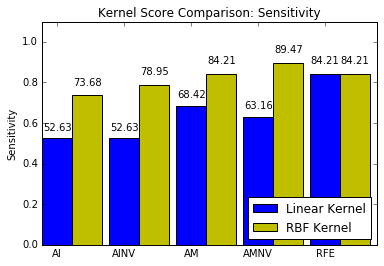

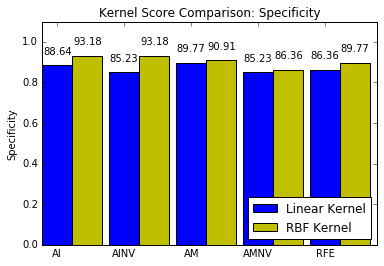

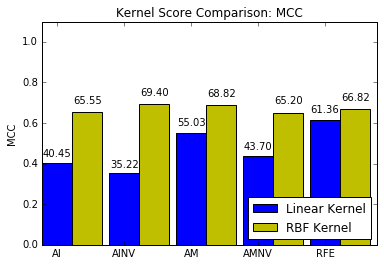

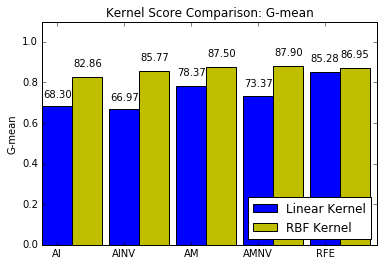

In [13]:
sensitivity_lin = ([
gmeani_all_lin[2][0],
gmeani_novoronoi_lin[2][0],
gmeanm_all_lin[2][0],
gmeanm_novoronoi_lin[2][0],
gmean_rfe_lin[2][0]])

sensitivity_rbf = ([
gmeani_all_rbf[2][0],
gmeani_novoronoi_rbf[2][0],
gmeanm_all_rbf[2][0],
gmeanm_novoronoi_rbf[2][0],
gmeanm_rfe_rbf[2][0]])

specificity_lin = ([
gmeani_all_lin[2][1],
gmeani_novoronoi_lin[2][1],
gmeanm_all_lin[2][1],
gmeanm_novoronoi_lin[2][1],
gmean_rfe_lin[2][1],
])


specificity_rbf =([
gmeani_all_rbf[2][1],
gmeani_novoronoi_rbf[2][1],
gmeanm_all_rbf[2][1],
gmeanm_novoronoi_rbf[2][1],
gmeanm_rfe_rbf[2][1]
])

matthews_lin = ([
gmeani_all_lin[2][2],
gmeani_novoronoi_lin[2][2],
gmeanm_all_lin[2][2],
gmeanm_novoronoi_lin[2][2],
gmean_rfe_lin[2][2],
])

matthews_rbf = ([
gmeani_all_rbf[2][2],
gmeani_novoronoi_rbf[2][2],
gmeanm_all_rbf[2][2],
gmeanm_novoronoi_rbf[2][2],
gmeanm_rfe_rbf[2][2]
])

gmean_lin = ([
gmeani_all_lin[2][3],
gmeani_novoronoi_lin[2][3],
gmeanm_all_lin[2][3],
gmeanm_novoronoi_lin[2][3],
gmean_rfe_lin[2][3],
])

gmean_rbf = ([
gmeani_all_rbf[2][3],
gmeani_novoronoi_rbf[2][3],
gmeanm_all_rbf[2][3],
gmeanm_novoronoi_rbf[2][3],
gmeanm_rfe_rbf[2][3]
])

scores_lin = [sensitivity_lin, specificity_lin, matthews_lin, gmean_lin]
scores_rbf = [sensitivity_rbf, specificity_rbf, matthews_rbf, gmean_rbf]
labels = ["Sensitivity", "Specificity", "MCC", "G-mean"]

for score_lin, score_rbf, label in zip(scores_lin, scores_rbf, labels):
    plot_bar_chart_comparison(score_lin, score_rbf, label)